In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pandas as pd
import helpers.mab_gaussian as GAUSS

In [5]:
#trying to reproduce Lattimore plot showing gittins outperforms Thompson Sampling
#plotting expected regret over gap size
num_arms = 5
T = 1000
samples = 400

numAlgs = 3
avg_regrets = [[] for i in range(numAlgs)]
c = np.linspace(0, 1, num = 25)

for delta in tqdm(c):
    goodArm = 0.5 + delta / 2
    badArm = 0.5 - delta / 2
    arms = [badArm for _ in range(num_arms - 1)]
    arms.append(goodArm)

    regrets = [[] for _ in range(numAlgs)]

    for i in tqdm(range(samples), leave = False):
        armData = [[] for _ in arms] #no data
        semiflat = [[0.5,0.1] for _ in arms] #flat-ish priors

        ts_reward = GAUSS.FS(T, arms, semiflat)
        gitt_reward = GAUSS.gittins_FS(T, arms, GAUSS.flat_priors(num_arms), armData)
        ucb_reward = GAUSS.UCB_FS(T, arms, GAUSS.flat_priors(num_arms), armData)

        regrets[0].append(T*goodArm - np.sum(ts_reward))
        regrets[1].append(T*goodArm - np.sum(gitt_reward))
        regrets[2].append(T*goodArm - np.sum(ucb_reward))

    for j in range(numAlgs):
        avg = np.mean(regrets[j])
        avg_regrets[j].append(avg)

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

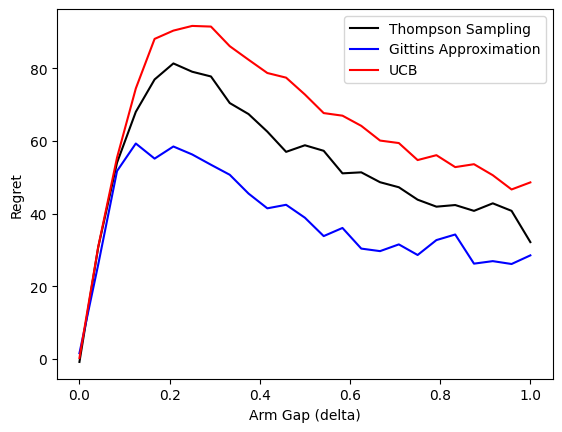

In [6]:
names = ["Thompson Sampling", "Gittins Approximation", "UCB"]
colors = ["black", "blue", "red"]

for i in range(numAlgs):
    plt.plot(c, avg_regrets[i], label = names[i], color=colors[i])

plt.xlabel("Arm Gap (delta)")
plt.ylabel("Regret")
plt.legend()